![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [10]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv('main_task_new.csv')
df_test = pd.read_csv('kaggle_task.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [12]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      10000 non-null  object 
 1   City               10000 non-null  object 
 2   Cuisine Style      7693 non-null   object 
 3   Ranking            10000 non-null  float64
 4   Price Range        6525 non-null   object 
 5   Number of Reviews  9343 non-null   float64
 6   Reviews            9998 non-null   object 
 7   URL_TA             10000 non-null  object 
 8   ID_TA              10000 non-null  object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [14]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [15]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [16]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant_id  10000 non-null  object 
 1   Rating         10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [17]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [ ]:
test_data = data.copy()

In [ ]:
test_data

In [ ]:
data.sample(5)

In [ ]:
data.Reviews[1]

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [ ]:
# Для примера я возьму столбец Number of Reviews
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

In [ ]:
data['Number_of_Reviews_isNAN']

In [ ]:
# Далее заполняем пропуски 0, вы можете попробовать заполнением средним или средним по городу и тд...
data['Number of Reviews'].fillna(0, inplace=True)
data.loc[:, ['Number of Reviews', 'Reviews']].head(20)

### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [33]:
data.nunique(dropna=False)

Restaurant_id        13094
City                    31
Cuisine Style        10732
Ranking              12975
Price Range              4
Number of Reviews     1574
Reviews              41858
URL_TA               49963
ID_TA                49963
sample                   2
Rating                  10
dtype: int64

Какие признаки можно считать категориальными?

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

In [ ]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
data = pd.get_dummies(data, columns=[ 'City',], dummy_na=True)

In [ ]:
data.head(5)

In [ ]:
data.sample(5)

#### Возьмем следующий признак "Price Range".

In [ ]:
data['Price Range'].value_counts().index[2]

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  
*Попробуйте сделать обработку этого признака уже самостоятельно!*

In [ ]:
# Ваша обработка 'Price Range'
def change_price(x):
    if x == '$$ - $$$':
        return 2
    if x == '$':
        return 1
    if x == '$$$$':
        return 3
    else:
        return x

In [ ]:
data['Price Range'] = data['Price Range'].apply(change_price)

In [ ]:
data['Price Range'].value_counts()

> Для некоторых алгоритмов МЛ даже для не категориальных признаков можно применить One-Hot Encoding, и это может улучшить качество модели. Пробуйте разные подходы к кодированию признака - никто не знает заранее, что может взлететь.

### Обработать другие признаки вы должны самостоятельно!
Для обработки других признаков вам возможно придется даже написать свою функцию, а может даже и не одну, но в этом и есть ваша практика в этом модуле!     
Следуя подсказкам в модуле вы сможете более подробно узнать, как сделать эти приобразования.

In [ ]:
# тут ваш код на обработку других признаков
# .....

![](https://cs10.pikabu.ru/post_img/2018/09/06/11/1536261023140110012.jpg)

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

In [ ]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

In [ ]:
df_train['City'].value_counts(ascending=True)[21:].plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

In [ ]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

In [ ]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


### Посмотрим распределение целевой переменной

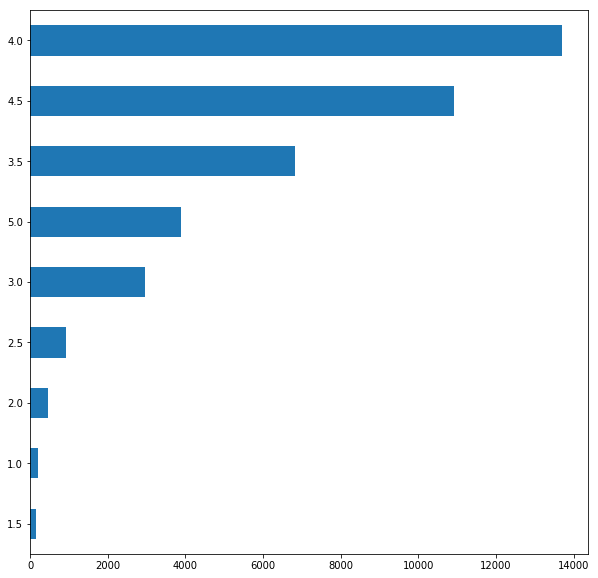

In [82]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

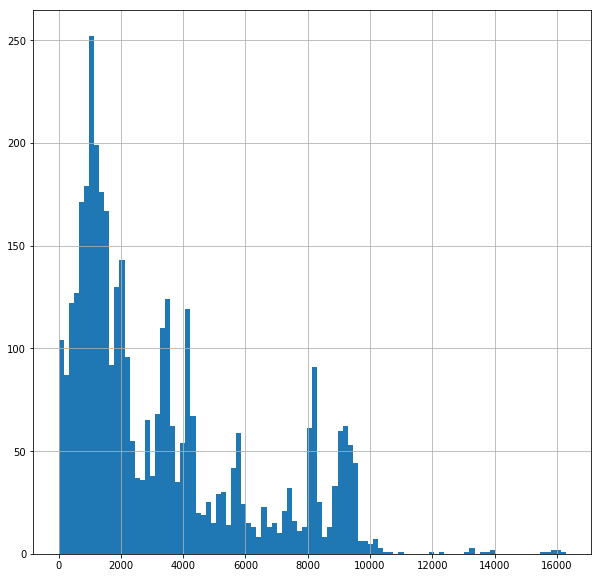

In [83]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

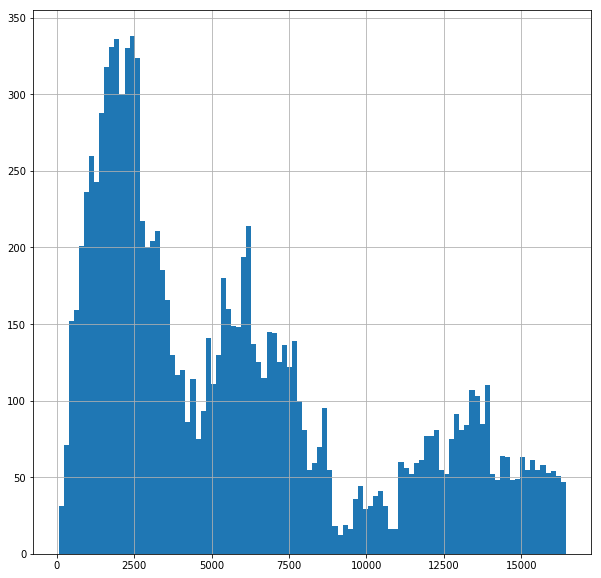

In [84]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

<AxesSubplot:>

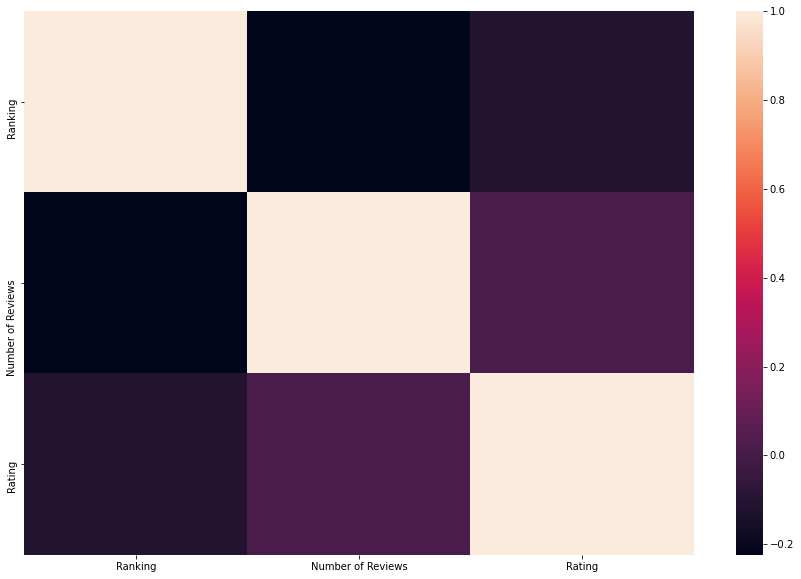

In [34]:
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [19]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv('main_task_new.csv')
df_test = pd.read_csv('kaggle_task.csv')
df_train['sample'] = 1  # помечаем где у нас трейн
df_test['sample'] = 0  # помечаем где у нас тест
# в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями
df_test['Rating'] = 0

data = df_test.append(df_train, sort=False).reset_index(
    drop=True)  # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [20]:
# словарь с населением городов, создан вручную
cities_dict = {'Paris': 2148327, 'Stockholm': 975550, 'London': 8961989, 'Berlin': 3669491, 'Munich': 1488202, 'Oporto': 214349, 'Milan': 1399860, 'Bratislava': 424428, 'Vienna': 1921153, 'Rome': 2790712, 'Barcelona': 1664182, 'Madrid': 3334730,
               'Dublin': 1173179, 'Brussels': 1212352, 'Zurich': 402762, 'Warsaw': 1793579, 'Budapest': 1750216, 'Copenhagen': 794023, 'Amsterdam': 872757, 'Lyon': 516092, 'Hamburg': 1845229, 'Lisbon': 506654, 'Prague': 1335084, 'Oslo': 697010, 'Helsinki': 656250,
               'Edinburgh': 482005, 'Geneva': 198979, 'Ljubljana': 279631, 'Athens': 664046, 'Luxembourg': 114303, 'Krakow': 779115}

In [21]:
import datetime
from datetime import datetime, timedelta

# Функция для кодировки признака Price Range


def change_price(x):
    if x == '$$ - $$$':
        return 2
    if x == '$':
        return 1
    if x == '$$$$':
        return 3
    else:
        return x

# Функция для извлечения дат отзывов из столбца с отзывами


def make_list_from_reviews(x):
    if type(x) == str:
        x = x.replace('[', '')
        x = x.replace(',', '')
        x = x.replace(' ', '')
        x = x.replace("'", '')
        x_list = x.split("]")
        return x_list[1]
    else:
        return x

# Функция для перевода дат отзывов в формат datetime


def to_datetime(x):
    if type(x) is str:
        if len(x) == 20:
            i = datetime.strptime(x[:10], '%m/%d/%Y')
            z = datetime.strptime(x[10:], '%m/%d/%Y')
            return [i, z]
        elif len(x) == 10:
            return datetime.strptime(x, '%m/%d/%Y')
        else:
            return None
    else:
        return None

# Функция для подсчета интервала написания отзывов, если отзывов больше 1


def time_between_reviews(x):
    if type(x) is list:
        y = x[0]-x[1]
        return y.days
    else:
        return None

# Функция для подсчета времени с последнего оставленного отзыва


def days_from_last_review(x):
    if type(x) is list:
        last_review = np.max(x)
        now = datetime.now()
        return (now - last_review).days
    else:
        if pd.isna(x):
            return x
        if not pd.isna(x):
            return (datetime.now() - x).days
        else:
            return x

# Функция для преобразовния формата данных в столбце кухонь из строкового в список


def make_list_for_cuisines(x):
    if type(x) == str:
        x = x.replace('[', '')
        x = x.replace(']', '')
        x = x.replace(' ', '')
        x = x.replace("'", '')
        x_list = x.split(',')
        return x_list
    else:
        return x

In [94]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''

    df_output = df_input.copy()
    test_data = df_input.copy()
    test_data['Cuisine Style'] = test_data['Cuisine Style'].apply(
        make_list_for_cuisines)
    explode_data = test_data.explode('Cuisine Style')

    # Создаем список из 5 самых популярных кухонь в ресторанах
    top_5_list = list(
        explode_data['Cuisine Style'].value_counts().head(5).index)

    # Создаем словарь с количеством ресторанов в каждом городе
    restaurants_amount_dict = dict(df_output['City'].value_counts())

    # Функция для проверки наличия в ресторане популярных кухонь
    def check_top_5(x):
        if type(x) is list:
            y = 0
            for i in x:
                if i in top_5_list:
                    y += 1
            return y
        else:
            return x

    # ################### 1. Предобработка ##############################################################
    # Убираем ненужные для модели признаки, редактируем существующие и создаем некоторые новые
    df_output.drop(['Restaurant_id', 'ID_TA', ], axis=1, inplace=True)
    df_output['Price Range'] = df_output['Price Range'].apply(change_price)
    df_output['population'] = df_output['City'].apply(lambda x: cities_dict[x])
    df_output['dates_of_Reviews'] = df_output['Reviews'].apply(
        make_list_from_reviews)
    df_output['dates_of_Reviews'] = df_output['dates_of_Reviews'].apply(
        to_datetime)
    df_output['quantity_of_reviews'] = df_output['dates_of_Reviews'].apply(
        time_between_reviews)
    df_output['last_review_days'] = df_output['dates_of_Reviews'].apply(
        days_from_last_review)
    df_output['amount_cuisines'] = test_data['Cuisine Style'].apply(
        lambda x: len(x) if type(x) is list else 1)
    df_output['top_5_cuisines'] = test_data['Cuisine Style'].apply(check_top_5)
    df_output['price_range_isnan'] = pd.isna(
        df_output['Price Range']).astype('uint8')

    # ################### 2. NAN ##############################################################
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
    df_output['Number of Reviews'].fillna(1, inplace=True)
    df_output['Price Range'].fillna(0, inplace=True)
    df_output['quantity_of_reviews'].fillna(
        df_output['quantity_of_reviews'].median(), inplace=True)
    df_output['last_review_days'].fillna(
        df_output['last_review_days'].mean(), inplace=True)
    df_output['top_5_cuisines'].fillna(0, inplace=True)

    # ################### 3. Feature Engineering ####################################################
    # тут ваш код не генерацию новых фитчей
    # Добавляем еще некоторые признаки после заполнения nan значений
    df_output['restaurant_amount'] = df_output['City'].apply(
        lambda x: restaurants_amount_dict[x])
    df_output['rank_per_restaurant'] = df_output['Ranking'] / \
        df_output['restaurant_amount']
    df_output['review_activity'] = df_output['Number of Reviews'] * \
        df_output['Ranking']

    # ################### 4. Encoding ##############################################################
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
    df_output = pd.get_dummies(df_output, columns=['City'], dummy_na=True)
    df_output['cuisines_and_prices'] = df_output['top_5_cuisines'] * \
        df_output['Price Range']
    df_output['rank_per_population'] = df_output['Ranking'] / \
        df_output['population']

    # ################### 5. Clean ####################################################
    # убираем признаки которые еще не успели обработать,
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    object_columns = [
        s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis=1, inplace=True)

    return df_output

>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

#### Запускаем и проверяем что получилось

In [95]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

,Ranking,Price Range,Number of Reviews,sample,Rating,population,quantity_of_reviews,last_review_days,amount_cuisines,top_5_cuisines,...,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan,cuisines_and_prices,rank_per_population
9465,425.0,3.0,115.0,0,0.0,402762,195.0,1517.000000,4,4.0,...,0,0,0,0,0,0,1,0,12.0,0.001055
24860,135.0,2.0,62.0,1,4.5,1845229,185.0,1389.000000,2,2.0,...,0,0,0,0,0,0,0,0,4.0,0.000073
2323,1171.0,0.0,1.0,0,0.0,794023,55.0,1544.032948,1,0.0,...,0,0,0,0,0,0,0,0,0.0,0.001475
31404,5935.0,2.0,130.0,1,3.5,2148327,317.0,1522.000000,2,1.0,...,1,0,0,0,0,0,0,0,2.0,0.002763
15756,3033.0,0.0,1.0,1,4.0,1335084,55.0,1544.032948,1,0.0,...,0,1,0,0,0,0,0,0,0.0,0.002272
23280,13036.0,0.0,20.0,1,3.5,8961989,-54.0,1432.000000,2,0.0,...,0,0,0,0,0,0,0,0,0.0,0.001455
2019,11557.0,1.0,9.0,0,0.0,2148327,865.0,2189.000000,2,0.0,...,1,0,0,0,0,0,0,0,0.0,0.005380
43933,1772.0,2.0,24.0,1,4.0,1488202,58.0,1828.000000,4,1.0,...,0,0,0,0,0,0,0,0,2.0,0.001191
31816,2525.0,1.0,33.0,1,4.0,1399860,178.0,2122.000000,1,0.0,...,0,0,0,0,0,0,0,0,0.0,0.001804
22546,401.0,2.0,91.0,1,4.0,779115,79.0,1338.000000,6,1.0,...,0,0,0,0,0,0,0,0,2.0,0.000515


<AxesSubplot:>

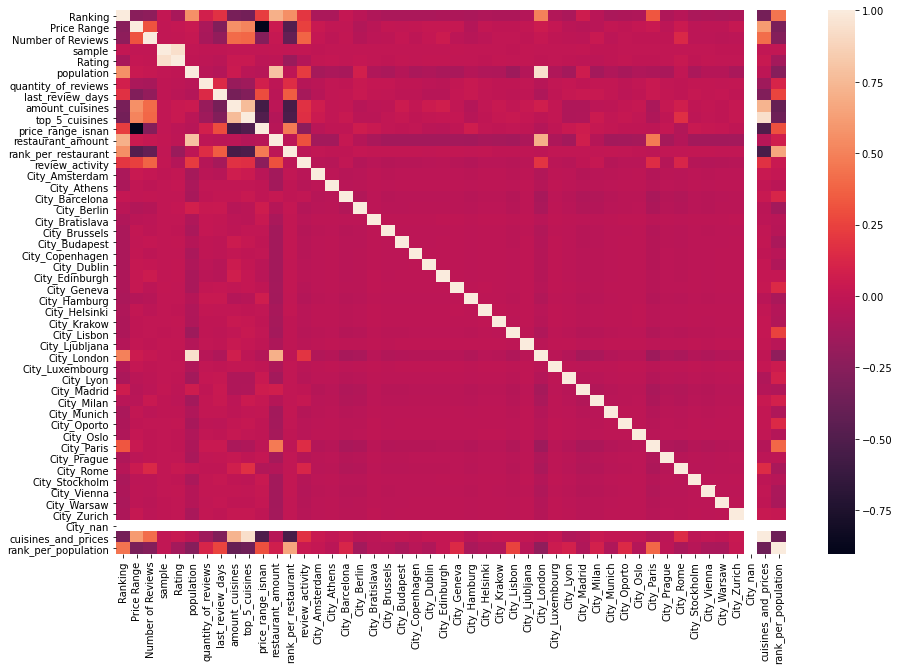

In [77]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(df_preproc.corr(),)

In [ ]:
df_preproc.info()

In [96]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [97]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [98]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 47), (40000, 47), (40000, 46), (32000, 46), (8000, 46))

# Model 
Сам ML

In [99]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [100]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [101]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [102]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.198814375


<AxesSubplot:>

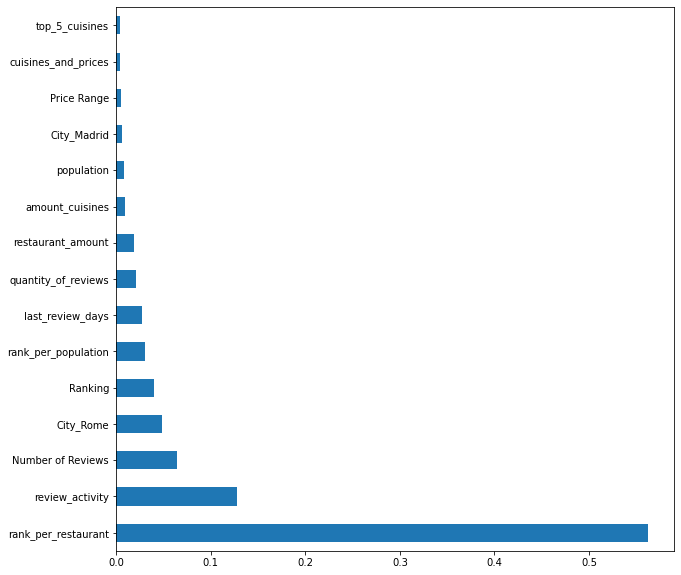

In [103]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [ ]:
test_data.sample(10)

In [ ]:
test_data = test_data.drop(['Rating'], axis=1)

In [ ]:
sample_submission

In [ ]:
predict_submission = model.predict(test_data)

In [ ]:
predict_submission

In [ ]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

# Вывод:
За основу своего ноутбука я взял предложенный на kaggle бэйзлайн и постарался доработать его исходя из данных датасета. По итогам работы над датафреймом получилось улучшить показатель МАЕ на 0.2 балла, по сравнению с предложенным на kaggle бэйзлайном. Добавил несколько признаков вытекающих из существующего Ranking, который по началу является самым весомым для модели. Обработал столбец с отзывами, взяв из него некоторую информацию по датам и отразил это в паре новых признаков. Также добавил еще некоторые признаки. Из сторонних источников взял только численность населения городов и вручную записал их в словарь, благо их всего 31. Не удалось самостоятельно найти решение как обработать сами отзывы и извлечь из них какую-то пользу. Также никакой информации больше из сторонних источников не почерпнул. Возможно нехватка этих данных и повлияла на столь незначительное улучшение МАЕ, с обработанными отзывами чувствую было бы гораздо лучше.